<a href="https://colab.research.google.com/github/MichaelSaavedraDx/MichaelSaavedraDx/blob/main/WS_of_Basic_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Engineering

## Introduction

In this notebook we will go through the process of environment setup and try packages mentioned in the theory part of the module

> We assume that you created fresh environment and installed notebook package on top of it

# New section

## Check style
It is really important to keep our code clean and understandable. We have checkstyle for Python  - **PEP-8**

For checking your code you can use - **Pylint** library
Install it, run it for your code and get output
```
pip install pylint
```
```
pylint mymodule.py
```
```
************* Module pylint.checkers.format
W: 50: Too long line (86/80)
W:108: Operator not followed by a space
     print >>sys.stderr, 'Unable to match %r', line
            ^
W:141: Too long line (81/80)
W: 74:searchall: Unreachable code
W:171:FormatChecker.process_tokens: Redefining built-in (type)
W:150:FormatChecker.process_tokens: Too many local variables (20/15)
W:150:FormatChecker.process_tokens: Too many branches (13/12)
```


## Conda environment

At this point you already have a working environment since you opened this notebook. The only packaged installed is notebook which is a part of jupyter ecosystem. Lets proceed with installation of other packages

## Pip
Data Science comes with many packages. The most popular way to install everything is via popular package installer **pip**

## Jupyter Notebook/Google Colab

Web-based interactive development environment for notebooks, code,and data. Its flexible interface allows users to configure and arrange workflows in data science, ML e.t.c


In [ ]:
2 + 2

4

## Using shell comands from the notebook
*numpy* provides efficient storage and computation for multidimensional data arrays
Then install *numpy* via pip, like this:



```
# pip install numpy
```

To run this and any other shell commands use ! symbol before the command itself

```
# !pip install numpy
```

To install pandas we are going to use conda instead. Look at command below:


*   You must use ```-y``` parameter when running ```conda install``` inside the notebook. Conda will prompt you to agree to installation. If you provide ```-y``` parameter, this will be omitted.
*   We also use ```-c conda-forge``` to install from specific conda channel. The channel is just a place where conda packages are stored. Many packages are not available in the official channels, however they are most likely available if conda-forge. Note, that pandas is available in official channel, but we use conda-forge just to get in touch.
*   The numbers after the package name is the version of the package which is going to be instlled. Here we have pandas version 1.0.5

```
#! conda install -y -c conda-forge pandas==1.0.5
```



# Numpy

###*numpy*, vectorization
*numpy * is rich and POWERFULL library. The idea behind it are optimized operations with matrices(or tensors when there are more than 2 dimensions). It is written in C, thus providing much better performance than pure Python. Same(or similar) interface is used in the most popular deep learning libraries like TensorFlow and PyTorch


The core principle of *numpy* is vectorization. Instead of calculating matrix opeartions in for cycle one number by one, *numpy* parallelize this operations obtaining much better performance


Let see it for ourselves. First we create a 200х200  matrix with integers ranging from 0 to 100. Then measure the time of matrix multiplication in two cases:

*  Matrix as list of list in pure Python
*  Matrix as optimized numpy array



In [ ]:
import numpy as np

mtx = np.random.randint(0, 100, size = (200, 200))

In [ ]:
print(f'Shape: {mtx.shape}')
mtx

Shape: (200, 200)


array([[98, 50, 98, ..., 20, 10, 48],
       [83, 54,  9, ..., 10, 14, 81],
       [19, 69, 43, ..., 18, 36, 87],
       ...,
       [93, 93, 33, ..., 31, 93, 69],
       [96, 93,  4, ..., 75, 88, 77],
       [94, 43,  5, ..., 64, 43, 31]])

In [ ]:
mtx_as_list = mtx.tolist()

In [ ]:
%%time
result = np.zeros_like(mtx).tolist()
for i in range(len(mtx_as_list)):
  for j in range(len(mtx_as_list)):
    for k in range(len(mtx_as_list)):
      result[i][j] += mtx_as_list[i][k] * mtx_as_list[k][j]

CPU times: user 2.81 s, sys: 0 ns, total: 2.81 s
Wall time: 2.82 s


In [ ]:
%%time
# @ - matrix multiplication operation in numpy
numpy_result = mtx @ mtx

CPU times: user 15.7 ms, sys: 863 µs, total: 16.6 ms
Wall time: 15.7 ms


As you can see matrix operation in Numpy are very optimized. Many other libraries, like *pandas*, build their operations on top of numpy

Below you can find some useful and interesting methods from *numpy* library:


In [ ]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.vstack((a,b))

array([[1, 2, 3],
       [4, 5, 6]])

Stack arrays in sequence vertically (row wise).

In [ ]:
x = np.array([3, 1, 2])
np.argsort(x)

array([1, 2, 0])

Returns the indices that would sort an array
See also
```
numpy.argpartition
```

## *numpy*, broadcasting
Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python

# Broadcasting rules
1. If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is *padded* with ones on its leading (left) side.
2. If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
3. If in any dimension the sizes disagree and neither is equal to 1, an error is raised.


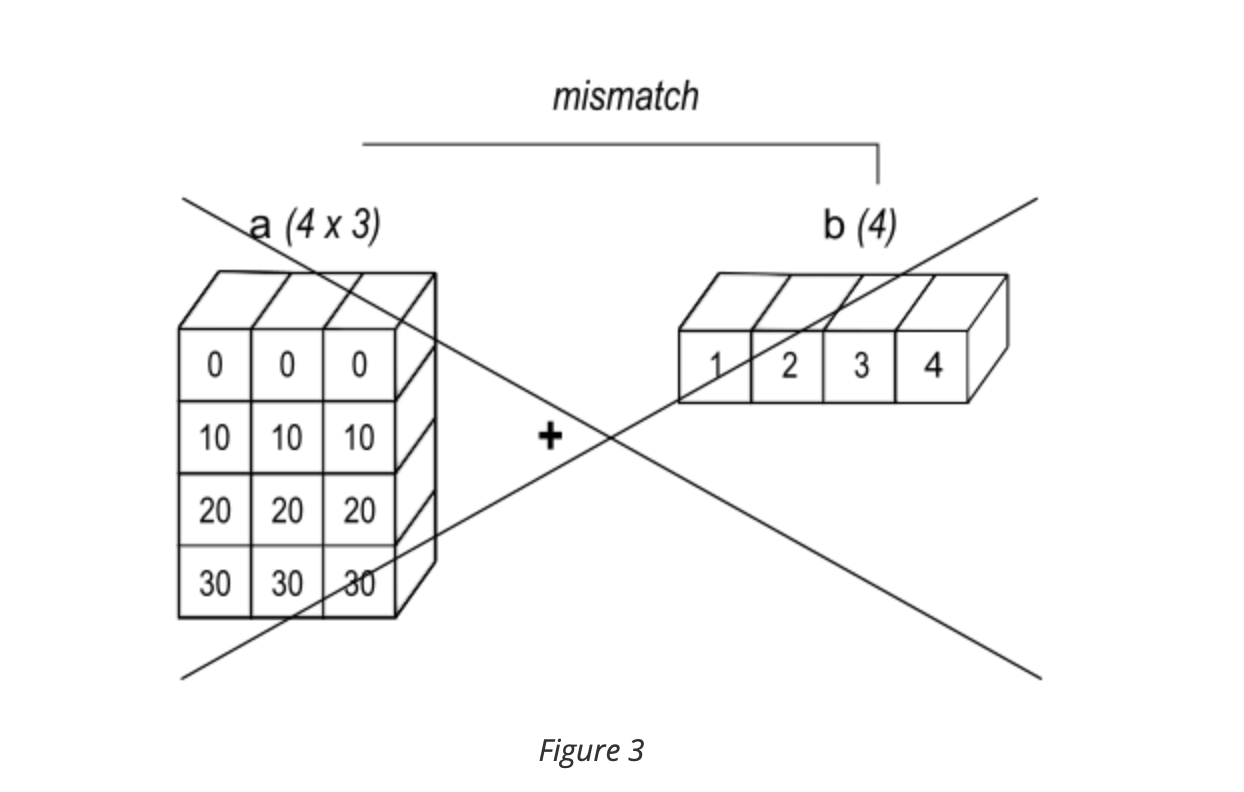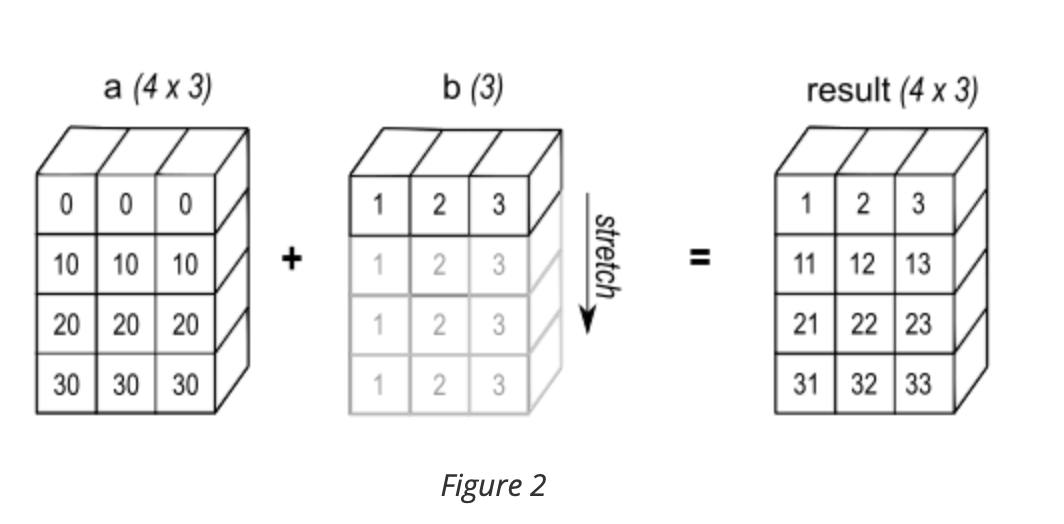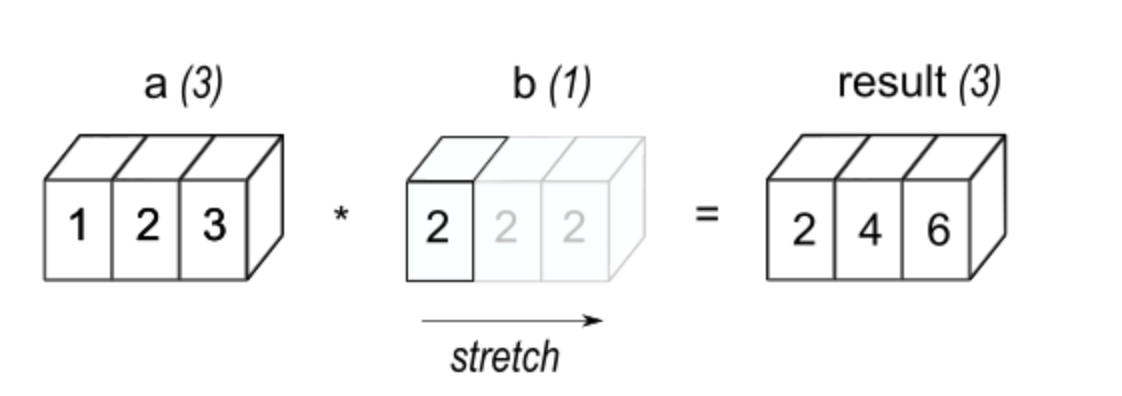

Let's take a look at an example in which the two arrays are not compatible:
```
M = np.ones((3, 2))
a = np.arange(3)
```
then their shape will be
```
M.shape -> (3,2)
a.shape -> (3, )
```
By rule 1, which tells us that we must pad the shape of ```a``` with ones:
```
M.shape -> (3,2)
a.shape -> (1,3)
```
By rule 2, the first dimension of ```a``` is stretched to match that of ```M```:
```
M.shape -> (3,2)
a.shape -> (3,3)
```
Now we hit the rule 3 - the final shapes do not match, so these two arrays are incompatible, as we can observe by attempting this operation:
```
M + a
```


In [ ]:
M = np.ones((3, 2))
a = np.arange(3)

In [ ]:
M.shape

(3, 2)

In [ ]:
a.shape

(3,)

In [ ]:
M + a

ValueError: ignored

## *numpy*, slicing


In [ ]:
#The basic slice syntax is i:j:k where i is the starting index,
# j is the stopping index, and k is the step
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x[1:7:2]

array([1, 3, 5])

In [ ]:
#Negative i and j are interpreted as n + i and n + j
#where n is the number of elements in the corresponding dimension.
#Negative k makes stepping go towards smaller indices
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x[-2:10]

array([8, 9])

In [ ]:
#Negative k makes stepping go towards smaller indices
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x[-3:3:-1]

array([7, 6, 5, 4])

# **Pandas**


Now let's look at Pandas.
Pandas provides a DataFrame object along with a powerful set of methods to manipulate, filter, group and transform data

Upload files with our datasets via URL, also we can use other methods, for instance put file in working directory

In [ ]:
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

*Google Colab* examples:

In [ ]:
a = [4, 6, 2, 7, 4, 6, 8, 9, 10, 6, 5, 3, 7, 8, 6, 3, 9, 2]

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris["species"]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [ ]:
iris["petal_length"] < 1.4

0      False
1      False
2       True
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: petal_length, Length: 150, dtype: bool

In [ ]:
iris["petal_length"] * 2

0       2.8
1       2.8
2       2.6
3       3.0
4       2.8
       ... 
145    10.4
146    10.0
147    10.4
148    10.8
149    10.2
Name: petal_length, Length: 150, dtype: float64

In [ ]:
iris["petal_length"].value_counts()

1.4    13
1.5    13
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7     1
3.8     1
6.6     1
6.3     1
1.0     1
6.9     1
3.6     1
6.4     1
Name: petal_length, dtype: int64

In [ ]:
iris.loc[iris['petal_length'] > 0.1]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris["petal_length"].value_counts(True)

1.4    0.086667
1.5    0.086667
5.1    0.053333
4.5    0.053333
1.6    0.046667
1.3    0.046667
5.6    0.040000
4.7    0.033333
4.9    0.033333
4.0    0.033333
4.2    0.026667
5.0    0.026667
4.4    0.026667
4.8    0.026667
1.7    0.026667
3.9    0.020000
4.6    0.020000
5.7    0.020000
4.1    0.020000
5.5    0.020000
6.1    0.020000
5.8    0.020000
3.3    0.013333
5.4    0.013333
6.7    0.013333
5.3    0.013333
5.9    0.013333
6.0    0.013333
1.2    0.013333
4.3    0.013333
1.9    0.013333
3.5    0.013333
5.2    0.013333
3.0    0.006667
1.1    0.006667
3.7    0.006667
3.8    0.006667
6.6    0.006667
6.3    0.006667
1.0    0.006667
6.9    0.006667
3.6    0.006667
6.4    0.006667
Name: petal_length, dtype: float64

In [ ]:
iris.apply(lambda this_df: this_df.petal_length > 0.1, axis=1)

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Length: 150, dtype: bool

Set of useful functions from ```pandas```
```
df_1 = pd.read_csv('filename.txt')
df.info()
df.columns
df.iloc[row_index, column_index]
df.loc[row_index, column_name]
df.corr()
df.describe()
df = df.drop(column, axis = 1)
df.shape
df.isnull().sum()
df.groupby(['column1']).aggregate_function()
df.select_dtypes('data_type')
df['column'].unique()
df.replace(old_value, new_value)
df.drop_duplicates(subset,keep)
df.set_index('column_name')
```

## [Useful functions](https://telegra.ph/24-Vazhnye-funkcii-Pandas-kotorye-neobhodimo-znat-dlya-kazhdogo-analiza-dannyh-11-12)

In [ ]:
# Calculate percentage of each rating number instead of absolute value

### YOUR CODE HERE

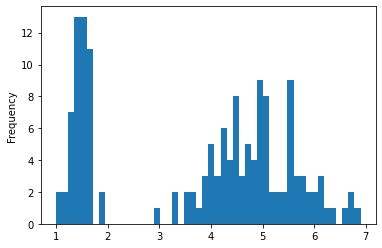

In [ ]:
# for this command need to install matplotlib
# + very fast to get aware, - very poor plot for presentation
iris["petal_length"].plot.hist(bins=50)

## *pandas*, reshaping
* ```stack()```: stack the prescribed level(s) from column to row
* ```unstack()```: unstack prescribed level(s) from row to column. The inverse operation from stack

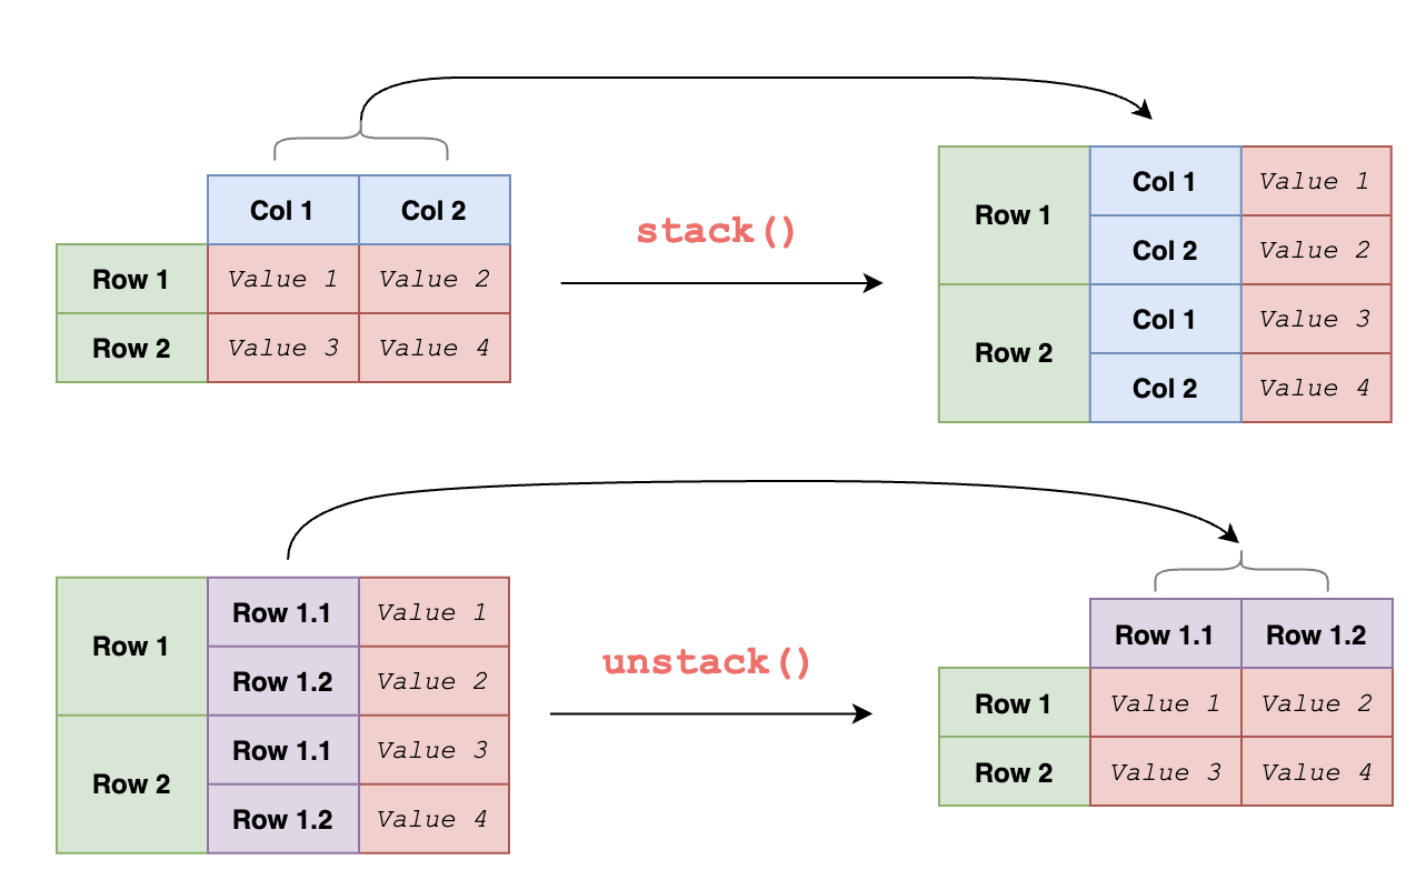

In [ ]:
df_single_level = pd.DataFrame(
    [['Mostly cloudy', 10], ['Sunny', 12]],
    index=['London', 'Oxford'],
    columns=['Weather', 'Wind']
)

df_single_level

,Weather,Wind
London,Mostly cloudy,10
Oxford,Sunny,12


In [ ]:
df_single_level.stack()

London  Weather    Mostly cloudy
        Wind                  10
Oxford  Weather            Sunny
        Wind                  12
dtype: object

In [ ]:
df_single_level.stack().unstack()

,Weather,Wind
London,Mostly cloudy,10
Oxford,Sunny,12


## Multi level columns: simple case

In [ ]:
multi_col_1 = pd.MultiIndex.from_tuples(
    [('Wind', 'mph'), ('Wind', 'm/s')]
)
df_multi_level_1 = pd.DataFrame(
    [[13, 5.5], [19, 8.5]],
    index=['London', 'Oxford'],
    columns=multi_col_1
)

df_multi_level_1

Wind     
        mph  m/s
London   13  5.5
Oxford   19  8.5

In [ ]:
df_multi_level_1.stack()
# Same as
#df_multi_level_1.stack(level=-1)
#df_multi_level_1.stack(-1)

Wind
London m/s   5.5
       mph  13.0
Oxford m/s   8.5
       mph  19.0

## Multiple levels: missing values

In [ ]:
multi_col_2 = pd.MultiIndex.from_tuples(
    [('Wind', 'mph'), ('Temperature', '°C')]
)
df_multi_level_2 = pd.DataFrame(
    [[13, 8], [19, 6]],
    index=['London', 'Oxford'],
    columns=multi_col_2
)
df_multi_level_2

,Wind,Temperature
,mph,°C
London,13,8
Oxford,19,6


In [ ]:
df_multi_level_2.stack()

Temperature  Wind
London mph          NaN  13.0
       °C           8.0   NaN
Oxford mph          NaN  19.0
       °C           6.0   NaN

## Multiple levels: prescribing the level(s) to be stacked

In [ ]:
multi_col_2 = pd.MultiIndex.from_tuples(
    [('Wind', 'mph'), ('Temperature', '°C')]
)
# Level 0
multi_col_2.get_level_values(0)

Index(['Wind', 'Temperature'], dtype='object')

In [ ]:
# Level 1
multi_col_2.get_level_values(1)

Index(['mph', '°C'], dtype='object')

In [ ]:
df_multi_level_2.stack(0)

mph   °C
London Temperature   NaN  8.0
       Wind         13.0  NaN
Oxford Temperature   NaN  6.0
       Wind         19.0  NaN

In [ ]:
df_multi_level_2.stack([0, 1])

London  Temperature  °C      8.0
        Wind         mph    13.0
Oxford  Temperature  °C      6.0
        Wind         mph    19.0
dtype: float64

In [ ]:
df_multi_level_2.stack([1, 0])

London  mph  Wind           13.0
        °C   Temperature     8.0
Oxford  mph  Wind           19.0
        °C   Temperature     6.0
dtype: float64

## unstack

In [ ]:
index = pd.MultiIndex.from_tuples([
  ('Oxford', 'Temperature'),
  ('Oxford', 'Wind'),
  ('London', 'Temperature'),
  ('London', 'Wind')
])
s = pd.Series([1,2,3,4], index=index)
s

Oxford  Temperature    1
        Wind           2
London  Temperature    3
        Wind           4
dtype: int64

In [ ]:
s.unstack()
# It's equivalent to
#s.unstack(level=-1)

,Temperature,Wind
London,3,4
Oxford,1,2


In [ ]:
# Unstack a specific level
s.unstack(level=0)

,London,Oxford
Temperature,3,1
Wind,4,2


In [ ]:
index = pd.MultiIndex.from_tuples([
  ('Oxford', 'Weather', '01-01-2022'),
  ('Oxford', 'Temperature', '01-01-2022'),
  ('Oxford', 'Weather', '02-01-2022'),
  ('Oxford', 'Temperature', '02-01-2022'),
  ('London', 'Weather', '01-01-2022'),
  ('London', 'Temperature', '01-01-2022'),
  ('London', 'Weather', '02-01-2022'),
  ('London', 'Temperature', '02-01-2022'),
])
s = pd.Series(
  ['Sunny', 10, 'Shower', 7, 'Shower', 5, 'Sunny', 8],
  index=index
)
s

Oxford  Weather      01-01-2022     Sunny
        Temperature  01-01-2022        10
        Weather      02-01-2022    Shower
        Temperature  02-01-2022         7
London  Weather      01-01-2022    Shower
        Temperature  01-01-2022         5
        Weather      02-01-2022     Sunny
        Temperature  02-01-2022         8
dtype: object

In [ ]:
# Method chaining
s.unstack().unstack()

# The equivalent
#s.unstack([2,1])

01-01-2022          02-01-2022        
       Temperature Weather Temperature Weather
London           5  Shower           8   Sunny
Oxford          10   Sunny           7  Shower

In [ ]:
s.unstack().unstack().unstack()

# The equivalent
#s.unstack([2,1,0])

01-01-2022  Temperature  London         5
                         Oxford        10
            Weather      London    Shower
                         Oxford     Sunny
02-01-2022  Temperature  London         8
                         Oxford         7
            Weather      London     Sunny
                         Oxford    Shower
dtype: object

## *pandas*, merge, join, concatenate

* Take the union of them all, ```join='outer'```. This is the default option as it results in zero information loss
* Take the intersection, ```join='inner'```


In [ ]:
df1 = pd.DataFrame(
    {
         "A": ["A0", "A1", "A2", "A3"],
         "B": ["B0", "B1", "B2", "B3"],
         "C": ["C0", "C1", "C2", "C3"],
         "D": ["D0", "D1", "D2", "D3"],
     },
     index=[0, 1, 2, 3],
 )

df2 = pd.DataFrame(
    {
         "A": ["A0", "A1", "A2", "A3"],
         "B": ["B0", "B1", "B2", "B3"],
         "C": ["C0", "C1", "C2", "C3"],
         "D": ["D0", "D1", "D2", "D3"],
     },
     index=[4, 5, 6, 7],
 )

frames = [df1, df2]

result = pd.concat(frames, axis=1)
result

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A0,B0,C0,D0
5,NaN,NaN,NaN,NaN,A1,B1,C1,D1
6,NaN,NaN,NaN,NaN,A2,B2,C2,D2
7,NaN,NaN,NaN,NaN,A3,B3,C3,D3


In [ ]:
result = pd.concat(frames, axis=0, join="inner")
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A0,B0,C0,D0
5,A1,B1,C1,D1
6,A2,B2,C2,D2
7,A3,B3,C3,D3


In [ ]:
result = pd.concat(frames, axis=1, join="inner")
result
#why here we get this result?

,A,B,C,D,A,B,C,D


In [ ]:
# we can also use reindex()
result = pd.concat([df1, df2], axis=0).reindex(df1.index)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


*pandas* has full-featured, high performance in-memory join operations idiomatically very similar to relational databases like *SQL*

In [ ]:
left = pd.DataFrame(
     {
         "key": ["K0", "K1", "K2", "K3"],
         "A": ["A0", "A1", "A2", "A3"],
         "B": ["B0", "B1", "B2", "B3"],
     }
 )


right = pd.DataFrame(
     {
         "key": ["K0", "K1", "K2", "K3"],
         "C": ["C0", "C1", "C2", "C3"],
         "D": ["D0", "D1", "D2", "D3"],
     }
 )

result = pd.merge(left, right, on="key")

```DataFrame.join()``` is a convenient method for combining the columns of two potentially differently-indexed *DataFrames* into a single result *DataFrame*

In [ ]:
left = pd.DataFrame(
   ....:     {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=["K0", "K1", "K2"]
   ....: )
   ....:

In [80]: right = pd.DataFrame(
   ....:     {"C": ["C0", "C2", "C3"], "D": ["D0", "D2", "D3"]}, index=["K0", "K2", "K3"]
   ....: )
   ....:

In [81]: result = left.join(right)

```pandas``` allowed to merge dataframes taking into account the order, it is useful for instance for time series data

In [ ]:
In [130]: left = pd.DataFrame(
   .....:     {"k": ["K0", "K1", "K1", "K2"], "lv": [1, 2, 3, 4], "s": ["a", "b", "c", "d"]}
   .....: )
   .....:

In [131]: right = pd.DataFrame({"k": ["K1", "K2", "K4"], "rv": [1, 2, 3]})

In [132]: pd.merge_ordered(left, right, fill_method="ffill", left_by="s")
Out[132]:
     k   lv  s   rv
0   K0  1.0  a  NaN
1   K1  1.0  a  1.0
2   K2  1.0  a  2.0
3   K4  1.0  a  3.0
4   K1  2.0  b  1.0
5   K2  2.0  b  2.0
6   K4  2.0  b  3.0
7   K1  3.0  c  1.0
8   K2  3.0  c  2.0
9   K4  3.0  c  3.0
10  K1  NaN  d  1.0
11  K2  4.0  d  2.0
12  K4  4.0  d  3.0

## *pandas*, crosstab

function builds a cross-tabulation table that can show the frequency with which certain groups of data appear

In [ ]:
# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df_raw = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
                     header=None, names=headers, na_values="?" )

# Define a list of models that we want to review
models = ["toyota","nissan","mazda", "honda", "mitsubishi", "subaru", "volkswagen", "volvo"]

# Create a copy of the data with only the top 8 manufacturers
df = df_raw[df_raw.make.isin(models)].copy()
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
30,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58.0,4800.0,49,54,6479.0
31,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,31,38,6855.0
32,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,79,1bbl,2.91,3.07,10.1,60.0,5500.0,38,42,5399.0
33,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,6529.0
34,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,7129.0


In [ ]:
pd.crosstab(df.make, df.body_style)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0,0,7,5,1
mazda,0,0,10,7,0
mitsubishi,0,0,9,4,0
nissan,0,1,5,9,3
subaru,0,0,3,5,4
toyota,1,3,14,10,4
volkswagen,1,0,1,9,1
volvo,0,0,0,8,3


In [ ]:
pd.crosstab(df.make, [df.body_style, df.drive_wheels])

In [ ]:
pd.crosstab(df.make, df.body_style, normalize='columns')

# Visualization
We have plenty of packages for visualising our results about exploration our dataset

below you can find example of usage *plotly* library


In [ ]:
import plotly.express as px

fig = px.scatter(iris, x="sepal_width", y="sepal_length", color='petal_width')
fig.show()